In [2]:
from qa_qc_lib.qa_qc_gis import QA_QC_GIS_second, QA_QC_GIS_first
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import plotly.express as px

In [3]:
kern = pd.read_excel('qa_qc_lib/data/Керн1.xlsx')
depth = kern['Глубина отбора образца после привязки к ГИС, м'].dropna().to_numpy()
poro = kern['Открытая пористость по воде, Кп, %'].dropna().to_numpy()
lithology = kern['Литологическое описание'].dropna().to_numpy()
poroeff = kern['Эффективная пористость, Кп эф, %'].dropna().to_numpy()
perm = kern['Газопроницаемость параллельно напластованию, Кпр, мД'].dropna().to_numpy()
las_path = 'qa_qc_lib/data/9281PL.las'

In [4]:
qaqcc = QA_QC_GIS_second(las_path, (2083, 2142), poro_open=poro, perm=perm, poro_eff=poroeff, lithology=lithology, depth=depth)
list_of_tests = qaqcc.get_list_of_tests()

Данные каротажи не были распознаны  ['FACIESNP', 'FACIES', 'FLUID', 'PALEOLITHOLOGY', 'LITHOLOGY', 'NOB', 'LOB', 'KGL1', 'KPR1', 'KPEF1', 'KP1', 'KN1', 'VSH', 'PERMEABILITY', 'EFFPOROSITY', 'POROSITY', 'R27PC_46PH', 'R27PC_46PH_TRANS', 'SOIL', 'TRUESTRATIGRAPHICTHICKNESS1', 'TRUEVERTICALTHICKNESS1', 'FLAG', 'FACIES_TEST', 'ONE-WAYTIME1', 'PORO0', 'PORO27', 'PORO20', 'PORO19', 'PORO9', "ZONELOGLINKEDTO'TOPS2016'"]


Тестирование качества увязки литологии по ГИС и по керну

Тест предназначен для оценки качества увязки литологии по керну и по ГИС в интервале рассматриваемого объекта. Для определения литологии по ГИС используется ПС каротаж (если ПС нет, то используется ГК), далее РИГИС литологии сопоставляется с литологией по керну на одинаковых глубинах.

        Args:
            siltmin (float, optional): Левая граница интервала амплитуд ПС и ГК, соответствующая алевролитам. Defaults to 0.4.

            siltmax (float, optional): Правая граница интервала амплитуд ПС и ГК, соответствующая алевролитам. Defaults to 0.7.

            sandmin (float, optional): Левая граница интервала амплитуд ПС и ГК, соответствующая песчанику. Defaults to 0.1.

            sandmax (float, optional): Правая граница интервала амплитуд ПС и ГК, соответствующая песчанику. Defaults to 0.4.

            argillitemin (float, optional): Левая граница интервала амплитуд ПС и ГК, соответствующая аргиллиту. Defaults to 0.7.

            argillitemax (float, optional): Правая граница

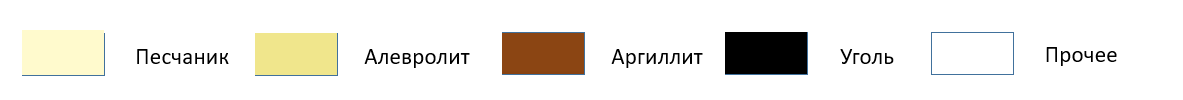

In [5]:
print(qaqcc.get_method_description('test_lithology'))
qaqcc.test_lithology()

Тестирование качества увязки РИГИС пористости, эффективной пористости и проницаемости с этими же свойствами по керну 

Тест предназначен для оценки качества увязки результатов керновых исследований и ГИС по пористости.

        Args:
            poro_model (_type_, optional): Модель пористости. Defaults to None.

            poroeff_model (_type_, optional): Модель эффективной пористости. Defaults to None.

            perm_model (_type_, optional): Модель проницаемости. Defaults to None.

            gis_type1 (str, optional): Название каротажа ГИС, по которому считается пористость. Defaults to 'rhob'.

            gis_type2 (_type_, optional): Название дополнительного каротажа ГИС, по которому считается пористость . Defaults to None.

            poro_perm_type (str, optional):Название свойства, по которому считается проницаемост. Defaults to 'poroeff'.

        


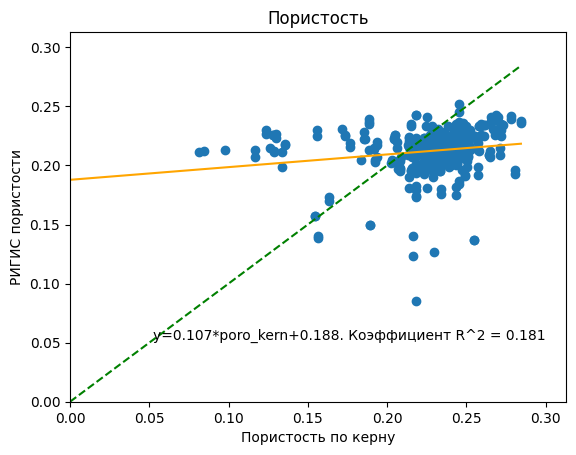

In [5]:
print(qaqcc.get_method_description('test_porosity'))
qaqcc.test_porosity(gis_type1='rhob')

In [6]:
print(qaqcc.get_method_description('test_porosityeff'))
qaqcc.test_porosityeff()

Тест предназначен для оценки качества увязки результатов керновых исследований и ГИС по эффективной пористости.

        Args:
            poro_model (_type_, optional): Модель пористости. Defaults to None.

            poroeff_model (_type_, optional): Модель эффективной пористости. Defaults to None.

            perm_model (_type_, optional): Модель проницаемости. Defaults to None.

            gis_type1 (str, optional): Название каротажа ГИС, по которому считается пористость. Defaults to 'rhob'.

            gis_type2 (_type_, optional): Название дополнительного каротажа ГИС, по которому считается пористость . Defaults to None.

            poro_perm_type (str, optional):Название свойства, по которому считается проницаемост. Defaults to 'poroeff'.

        


Тест предназначен для оценки качества увязки результатов керновых исследований и ГИС по проницаемости.
        Args:
            poro_model (_type_, optional): Модель пористости. Defaults to None.

            poroeff_model (_type_, optional): Модель эффективной пористости. Defaults to None.

            perm_model (_type_, optional): Модель проницаемости. Defaults to None.

            gis_type1 (str, optional): Название каротажа ГИС, по которому считается пористость. Defaults to 'rhob'.

            gis_type2 (_type_, optional): Название дополнительного каротажа ГИС, по которому считается пористость . Defaults to None.

            poro_perm_type (str, optional):Название свойства, по которому считается проницаемост. Defaults to 'poroeff'.

        


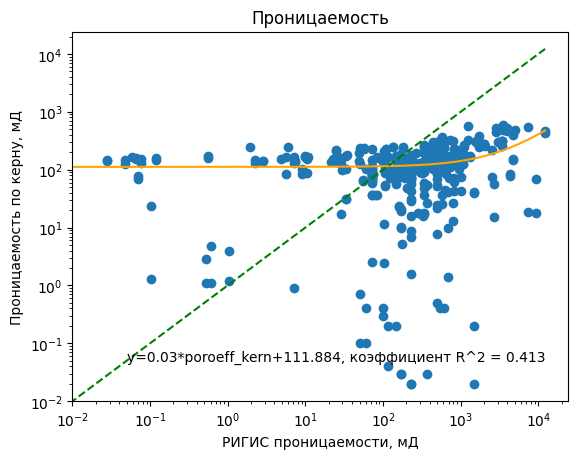

In [7]:
print(qaqcc.get_method_description('test_permeability'))
qaqcc.test_permeability(gis_type1='rhob')

Тестирование соответсвия модели водонасыщенности по Арчи и по J-функции

In [10]:
print(qaqcc.get_method_description('test_saturation'))
qaqcc.test_saturation()

Тест предназначен для сопоставления моделей водонасыщенности(Арчи, J функция, ОФП) и оценки качества их увязки с данными по керну.

        Args:
            poro_model (_type_): Модель пористости.

            Archi_kern (_type_): Водонасыщенность по керну для модели Арчи.

            J_kern (_type_): Водонасыщенность по керну для модели J функции.

            ofp_kern (_type_): Водонасыщенность по керну для модели по офп.

            Archi_model (_type_, optional): Модель водонасыщенности Арчи. Defaults to None.

            J_model (_type_, optional): Модель водонасыщенности по J функции. Defaults to None.

            ofp_model (_type_, optional): Модель водонасыщенности по офп. Defaults to None.

            gis_type (str, optional): Каротаж ГИС, использующийся в модели Арчи. Defaults to 'ild'.

            poroeff_model (_type_, optional): Модель эффективной пористости. Defaults to None.

            perm_model (_type_, optional): Модель проницаемости. Defaults to None.

     

TypeError: test_saturation() missing 4 required positional arguments: 'poro_model', 'Archi_kern', 'J_kern', and 'ofp_kern'

Тестирование наличия записи ГИС в интервале пласта

In [11]:
qaqcc.test_skipped_gis()

В каротаже gr пропуски на следующих глубинах:
2090.41 - 2090.7
В каротаже rhob пропуски больше 0.5м. 



Тестирование на наличие интервалов перекрытия для основной и повторной записи ГИС

In [12]:
qaqcc.test_repeat()

Перекрытия интервалов в данных нет


Тестирование на наличие несоответствий отметок пластопересечений и глубинного диапазона ГИС

In [13]:
qaqcc.test_max_value_gis()

Максимальная глубина по отбивке 2142, максимальная глубина по ГИС 2468.1. Тест пройден


Тестирование на соответствие размерностей глубин в ГИС и в файле с отметками пластопересечений

In [14]:
qaqcc.test_units()

В ГИС и в файле с отбивками глубина измеряется в метрах


In [21]:
qaqcc.generate_test_result()

In [20]:
las_path = '../qaqcgis/data/9281PL.las'
qaqc = QA_QC_GIS_first(las_path = las_path)

In [22]:
list_of_tests = qaqc.get_list_of_tests()
qaqc.start_tests(list_of_tests)
qaqc.generate_test_report()